# **Exploring User Engagement Patterns on Social Media: An Analysis of Country, Age, User Duration, and Likes - Esther John**

**Objective:**
The objective of this project is to analyze user engagement on social media platforms by examining the relationship between users' countries, age groups, duration of activity, and the number of likes received. The goal is to identify patterns in user duration and likes across different countries and age groups, understand how age and geographical location influence user activity, and derive insights that can help tailor content strategies to maximize user engagement.

This dataset was gotten from kaggle.com

# Importing Packages

In [ ]:
# Importing essential libraries for data analysis and visualization
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations
import seaborn as sns # For statistical data visualization
import matplotlib.pyplot as plt # For creating static, animated, and interactive visualizations


In [ ]:
from google.colab import drive # Import the tool to access Google Drive
drive.mount('/content/drive') # Connect your Google Drive so you can access it in Colab

Mounted at /content/drive


# Loading and exploring the data

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/EDA WITH PYTHON/social-media.csv')

# Display the first few rows of the dataset to understand its structure
df.head()


,UserId,UsageDuraiton,Age,Country,TotalLikes
0,1,2,55,Turkey,5
1,2,6,45,Canada,10
2,3,3,50,Ireland,7
3,4,4,35,South Africa,5
4,5,1,58,Turkey,2


In [ ]:
df.info() #Displays the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserId         63 non-null     int64 
 1   UsageDuraiton  63 non-null     int64 
 2   Age            63 non-null     int64 
 3   Country        63 non-null     object
 4   TotalLikes     63 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.6+ KB


Insight: The dataset has columns 4 integers and one object type (string)

In [ ]:
df.shape # Displays the number of rows and columns in the dataframe

(63, 5)

# Statistical Summary and Insights

In [ ]:
df.describe() #Displays the statistical summary of the dataframe

,UserId,UsageDuraiton,Age,TotalLikes
count,63.000000,63.000000,63.000000,63.000000
mean,31.761905,4.000000,33.777778,5.317460
std,18.015866,2.879292,15.540213,6.135106
min,1.000000,1.000000,18.000000,0.000000
25%,16.500000,2.000000,19.000000,1.500000
50%,32.000000,3.000000,26.000000,4.000000
75%,47.500000,5.000000,50.000000,6.000000
max,62.000000,13.000000,60.000000,28.000000


**1. UserId:**

Min (1) & Max (62): User IDs range from 1 to 62, indicating there are 63 users in total.

**2. UsageDuration:**
Mean (4 hours): On average, users spend 4 hours on the social media platform.

Standard Deviation (2.88 hours): This indicates there is variability in user usage times. Some users may spend much more or much less time than the average.

Min (1 hour) & Max (13 hours): The shortest usage recorded is 1 hour, while the longest is 13 hours, showing a wide range of user engagement times.

25th Percentile (2 hours), Median (3 hours), 75th Percentile (5 hours): Half of the users spend between 2 to 5 hours on the platform, with the median (middle value) being 3 hours.
Insight Questions:

Are users spending more time than expected on the platform, given the average and median usage times?

What might be influencing the high variability in usage duration?

**3. Age:**
Mean (33.78 years): The average age of users is around 34 years.
Standard Deviation (15.54 years): This indicates there is a considerable range in the ages of users, with a spread of about 15 years.

Min (18 years) & Max (60 years): The youngest user is 18 years old, and the oldest is 60 years old, indicating a diverse age group.

25th Percentile (19 years), Median (26 years), 75th Percentile (50 years): This shows that younger users make up a significant portion of the dataset, with half of the users being under 26 years old.

Insight Questions:
How do different age groups engage with the platform based on their usage duration?

Is there a correlation between age and the amount of time spent on the platform?

**4. TotalLikes**
Mean (5.32 likes): On average, users receive around 5 likes.

Standard Deviation (6.14 likes): The wide spread indicates that some users receive significantly more likes than others.

Min (0 likes) & Max (28 likes): Some users receive no likes at all, while others receive up to 28 likes.

25th Percentile (1.5 likes), Median (4 likes), 75th Percentile (6 likes): This means that 50% of the users receive between 1.5 to 6 likes, with 4 likes being the middle point.

Insight Questions:

Are there any age groups that tend to receive more likes on average?

What factors might influence the number of likes a user receives, such as their age or the amount of time they spend on the platform?

# Data Cleaning

In [ ]:
 #Displays the number of duplicated rows in the #dataframe
 df.duplicated().sum()

0

In [ ]:
df.isnull().sum() #Displays the number of missing values in each column

,0
UserId,0
UsageDuraiton,0
Age,0
Country,0
TotalLikes,0


In [ ]:
df.columns #Displays the name of the columns in the data frame

Index(['UserId', 'UsageDuraiton', 'Age', 'Country', 'TotalLikes'], dtype='object')

In [ ]:
# Rename the "UsageDuraiton" column to "UsageDuration" for consistency
df.rename(columns={'UsageDuraiton': 'UsageDuration'}, inplace=True)

In [ ]:
df.columns

Index(['UserId', 'UsageDuration', 'Age', 'Country', 'TotalLikes'], dtype='object')

In [ ]:
# Check for duplicate rows in the DataFrame and count them
duplicates = df.duplicated().sum()
# Print the number of duplicate rows found
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


In [ ]:
# Remove duplicate rows from the DataFrame if any are found
df = df.drop_duplicates()

In [ ]:
# Calculate the first quartile (25th percentile) of the "TotalLikes" column
Q1 = df['TotalLikes'].quantile(0.25)
# Calculate the third quartile (75th percentile) of the "TotalLikes" column
Q3 = df['TotalLikes'].quantile(0.75)
# Compute the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows where "TotalLikes" values fall outside the outlier range
outliers = df[(df['TotalLikes'] < lower_bound) | (df['TotalLikes'] > upper_bound)]
# Print the detected outliers
print('Detected outliers:')
print(outliers)


Detected outliers:
    UserId  UsageDuration  Age    Country  TotalLikes
5        6             13   18     Turkey          25
15      16             11   18  Singapore          25
36      37              8   18  Singapore          19
55      55              8   18  Australia          28
59      59              8   19    Germany          15
61      61              9   18    Germany          18


In [ ]:
# Display the data types of each column
print("Data Types of Each Column:")
print(df.dtypes)

Data Types of Each Column:
UserId            int64
UsageDuration     int64
Age               int64
Country          object
TotalLikes        int64
dtype: object


In [ ]:
# Convert 'userid' from integer to object
df['UserId'] = df['UserId'].astype(object)

In [ ]:
# Confirm the change by displaying the data types again
print("\nData Types After Conversion:")
print(df.dtypes)


Data Types After Conversion:
UserId           object
UsageDuration     int64
Age               int64
Country          object
TotalLikes        int64
dtype: object


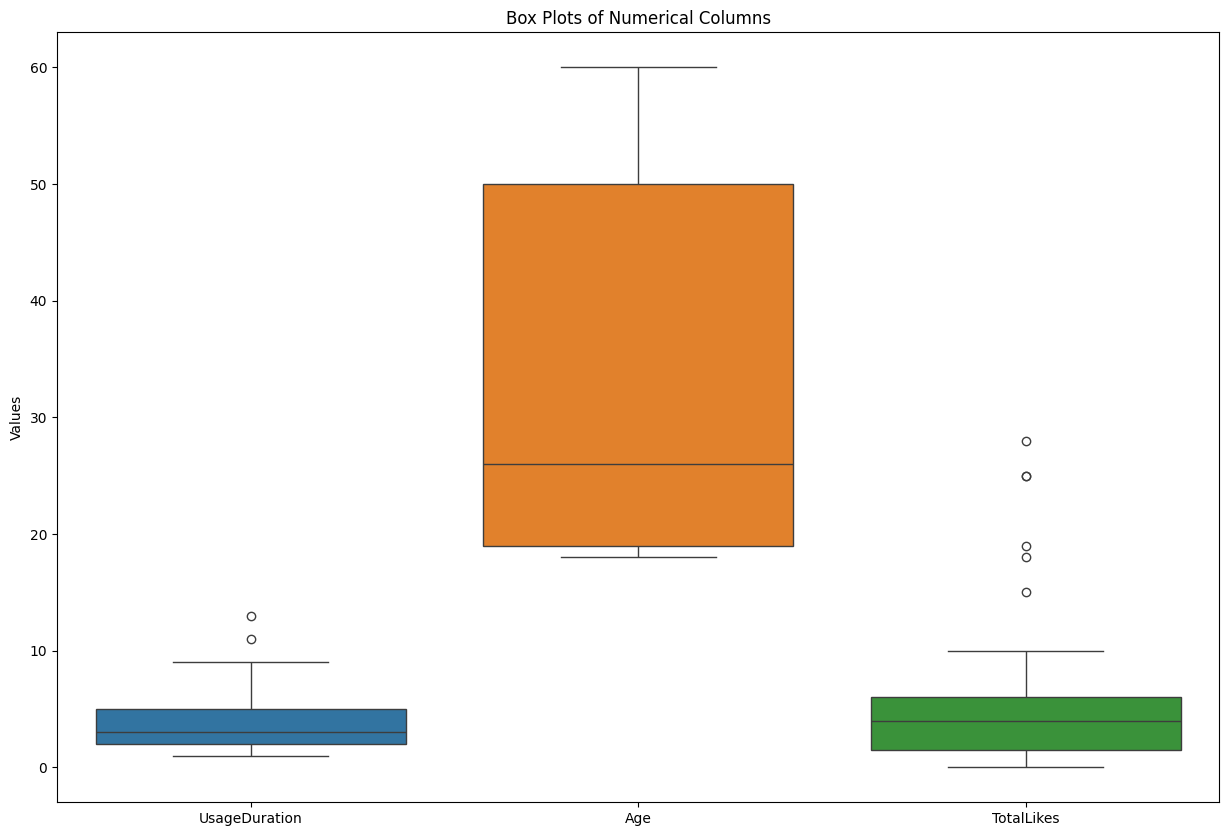

In [ ]:
# Set the size of the figure for better visibility
plt.figure(figsize=(15, 10))

# Create a grid of boxplots for each numerical column
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))

# Set the title and labels
plt.title('Box Plots of Numerical Columns')
plt.ylabel('Values')      # Label the y-axis

# Display the boxplots
plt.show()

In [ ]:
# Remove outliers from the DataFrame
df = df[(df['TotalLikes'] >= lower_bound) & (df['TotalLikes'] <= upper_bound)] #Check TotalLikes Column for outliers and remove them
df = df[(df['UsageDuration'] >= lower_bound) & (df['UsageDuration'] <= upper_bound)] #Check UsageDuration Column for outliers and remove them
print("Data shape after removing outliers:", df.shape) #Print the shape of the data after removing the outliers


Data shape after removing outliers: (57, 5)


# Univariate Analysis

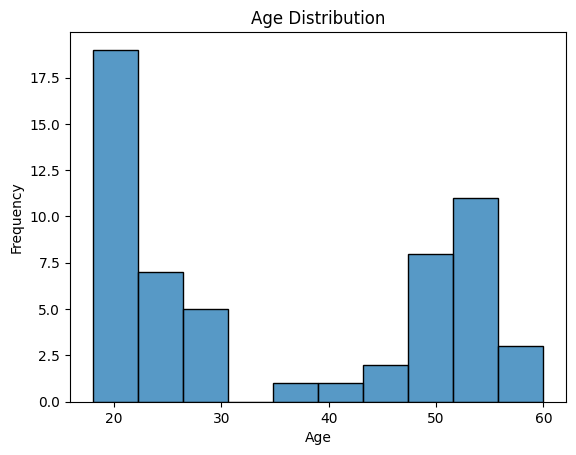

In [ ]:
# Create a histogram to show the distribution of ages
sns.histplot(df['Age'], bins=10)
# Set the title of the plot
plt.title('Age Distribution')
# Label the x-axis as 'Age'
plt.xlabel('Age')
# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')
# Display the plot
plt.show()


**INSIGHT:** A majority of the users fall into the "18-30" age range, which is typically a key demographic for social media platforms.


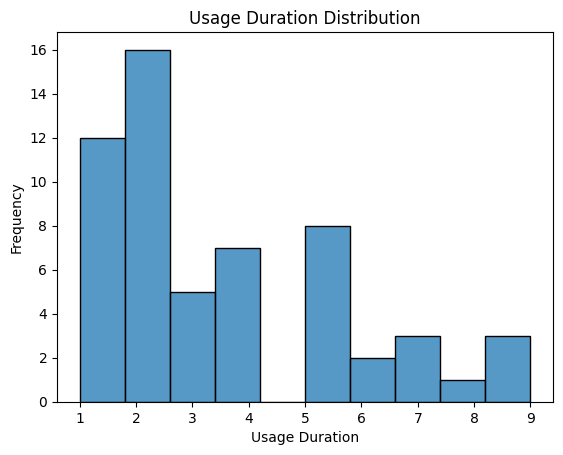

In [ ]:
# Create a histogram to show the distribution of Usage Duration
sns.histplot(df['UsageDuration'], bins=10)
# Set the title of the plot
plt.title('Usage Duration Distribution')
# Label the x-axis as 'Age'
plt.xlabel('Usage Duration')
# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')
# Display the plot
plt.show()

**INSIGHT:** Most users spend between 1 to 4 hours per day on social media, which suggests a high engagement rate but not necessarily extreme overuse.


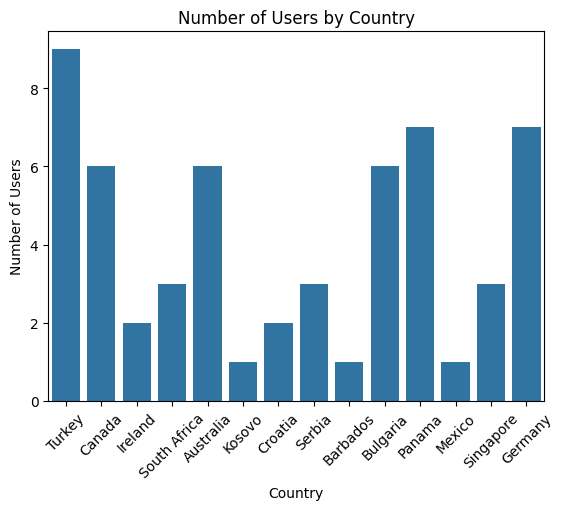

In [ ]:
# Create a count plot to show the number of users per country
sns.countplot(x='Country', data=df)
# Set the title of the plot
plt.title('Number of Users by Country')
# Label the x-axis as 'Country'
plt.xlabel('Country')
# Label the y-axis as 'Number of Users'
plt.ylabel('Number of Users')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Display the plot
plt.show()

**INSIGHT:** Countries like Turkey, Germany, and Bulgaria seem to value social media as opposed to countries like Kosovo, Barbados and Mexico


# Bivariate Analysis

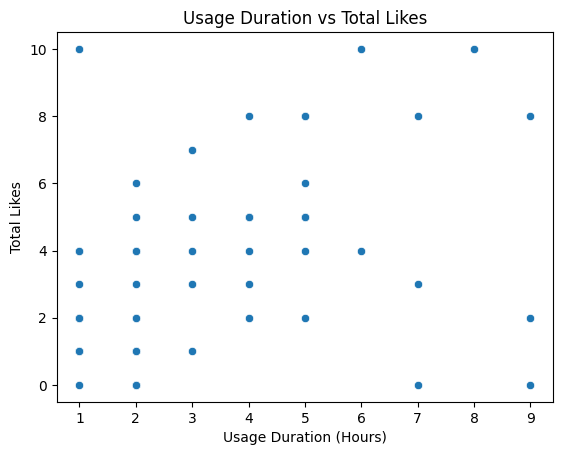

In [ ]:
# Create a scatter plot to show the relationship between usage duration and total likes
sns.scatterplot(x='UsageDuration', y='TotalLikes', data=df)
# Set the title of the plot
plt.title('Usage Duration vs Total Likes')
# Label the x-axis as 'Usage Duration (Hours)'
plt.xlabel('Usage Duration (Hours)')
# Label the y-axis as 'Total Likes'
plt.ylabel('Total Likes')
# Display the plot
plt.show()


**INSIGHT:** Longer durations on social media tend to be associated with more likes, but this relationship is not linear, suggesting that content quality may also play a role.


In [ ]:
L

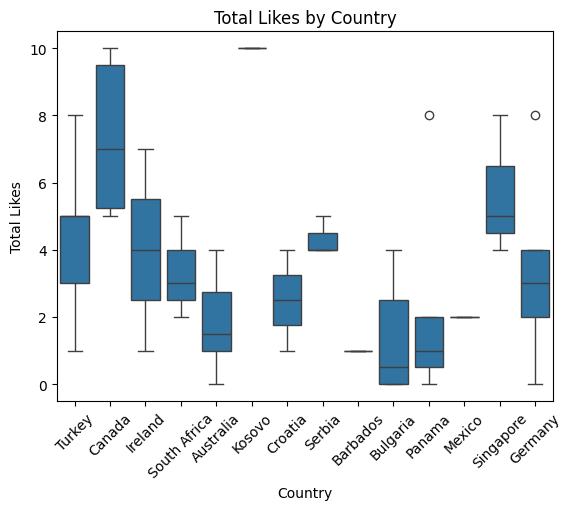

In [ ]:
# Create a boxplot to show the distribution of age by country
sns.boxplot(x='Country', y='TotalLikes', data=df)
# Set the title of the plot
plt.title('Total Likes by Country')
# Label the x-axis as 'Country'
plt.xlabel('Country')
# Label the y-axis as 'Age'
plt.ylabel('Total Likes')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Display the plot
plt.show()


**INSIGHT:** Country-Based Preferences: The average number of likes varies significantly by country, which may indicate different levels of engagement on social media across regions.

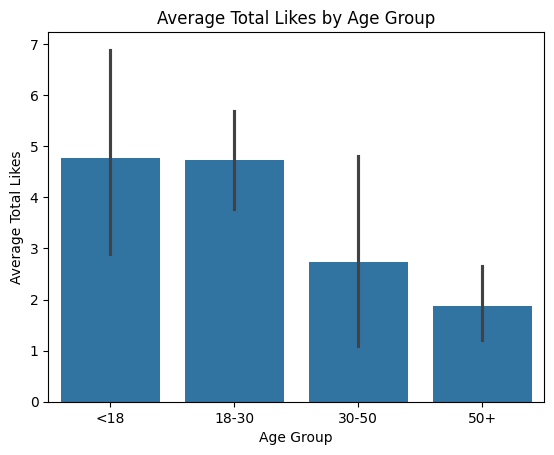

In [ ]:
# Create age groups using pandas cut function
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['<18', '18-30', '30-50', '50+'])
# Create a bar plot to show average total likes by age group
sns.barplot(x='AgeGroup', y='TotalLikes', data=df)
# Set the title of the plot
plt.title('Average Total Likes by Age Group')
# Label the x-axis as 'Age Group'
plt.xlabel('Age Group')
# Label the y-axis as 'Average Total Likes'
plt.ylabel('Average Total Likes')
# Display the plot
plt.show()


**INSIGHT:** Users in the "18-30" age group tend to have higher usage duration and receive more likes, as seen from the univariate and multivariate analyses

# Multivariate Analysis

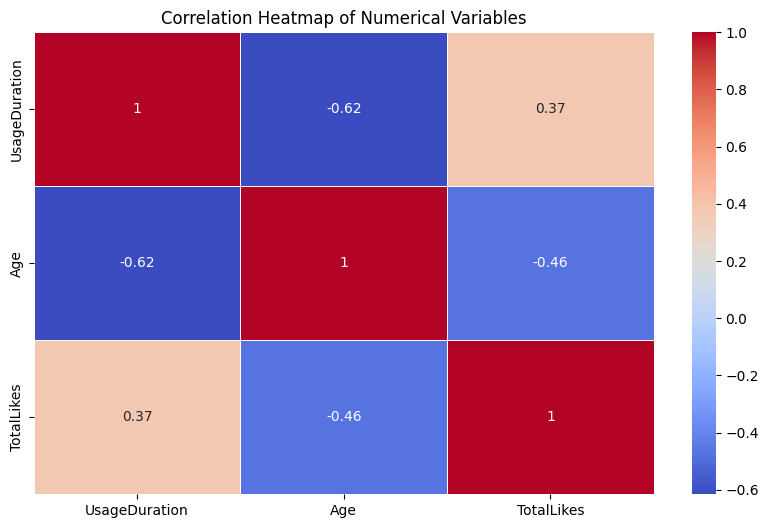

In [ ]:
#Calculate the correlation matrix to understand relationships between numerical variables

# Select all the numerical columns in the dataframe, store them in a variable called numeric_cols
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Create a heatmap using seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

'''Just breaking down the last code using multiline comment for better understanding
#sns.heatmap(correlation_matrix, # The correlation matrix to visualize
#            annot=True,         # Display the correlation coefficient values on the heatmap
#            cmap='coolwarm',    # Use the 'coolwarm' color map to indicate positive and negative correlations
#            linewidths=0.5)     # Set the width of the lines that separate each cell in the heatmap'''


# Set the title of the heatmap
plt.title('Correlation Heatmap of Numerical Variables')

plt.show() #show the plot

**Correlation Insights:** The heatmap reveals that there may be a positive correlation between longer usage duration and the number of likes a user gets.


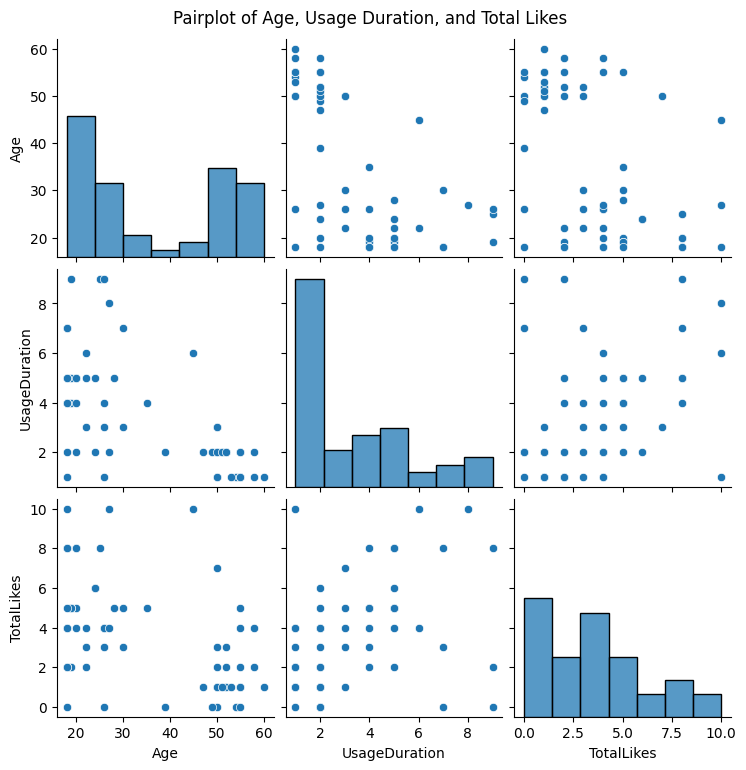

In [ ]:
# Use seaborn's pairplot to create scatter plots and histograms for pairs of variables
sns.pairplot(df, vars=['Age', 'UsageDuration', 'TotalLikes'])
# Set the title of the pairplot for better understanding
plt.suptitle('Pairplot of Age, Usage Duration, and Total Likes', y=1.02)
# Display the pairplot
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

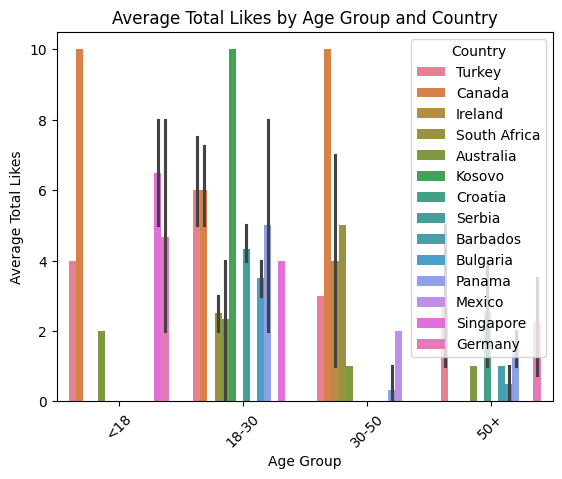

In [ ]:
# Create a grouped bar plot to show the average total likes by age group and country
sns.barplot(x='AgeGroup', y='TotalLikes', hue='Country', data=df)
# Set the title of the plot
plt.title('Average Total Likes by Age Group and Country')
# Label the x-axis as 'Age Group'
plt.xlabel('Age Group')
# Label the y-axis as 'Average Total Likes'
plt.ylabel('Average Total Likes')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Display the plot
plt.show()


**INSIGHT:** Across most of the countries, Users in the "18-30" age group tend to have higher usage duration and receive more likes, as seen from the univariate and multivariate analyses.


# Conclusion and Recommendations

In [ ]:
#Import files from google colab
from google.colab import files

# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_social_media.csv', index=False)

# Download the saved CSV file to your local machine
files.download('cleaned_social_media.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Based on the analysis, we can derive several key insights:**

Correlation Insights: The heatmap reveals that there may be a positive correlation between longer usage duration and the number of likes a user gets.

Age Group by Country Analysis: Across most of the countries, Users in the "18-30" age group tend to have higher usage duration and receive more likes.

Country-Based Preferences: The average number of likes varies significantly by country, which may indicate different levels of engagement on social media across regions.

Outliers Identified: Outliers in TotalLikes suggest that some users have unusually high engagement, which could be indicative of influencers or particularly active users.

Usage Duration: Most users spend between 1 to 4 hours per day on social media, which suggests a high engagement rate but not necessarily extreme overuse.

Age Distribution: A majority of the users fall into the "18-30" age range, which is typically a key demographic for social media platforms.

Engagement Trends: Longer durations on social media tend to be associated with more likes, but this relationship is not linear, suggesting that content quality may also play a role.

**Recommendations:**

*   Platform Popularity: If there is a column indicating the social media platform, analysis could show which platforms are most popular in specific regions or age groups.

*  Gender Analysis: If gender data is available, it could reveal whether there are differences in social media behavior between males and females.
